In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('../input/toxic-comments.csv')
df.head(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [121]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [122]:
toxicities = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [123]:
df[toxicities] 

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [124]:
comments = df.sum(numeric_only=True)
comments

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

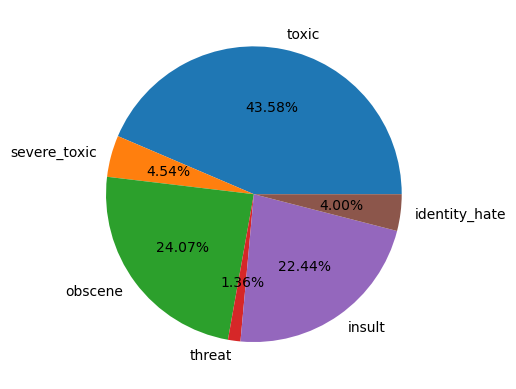

In [125]:
plt.pie(comments.values, labels=comments.index, autopct='%2.2f%%');

In [126]:
neutral = df[df[toxicities].sum(axis=1) == 0]
neutral.shape[0]

143346

In [127]:
total = df.sum(axis=1, numeric_only=True)
neutral = sum(total==0)
toxic = sum(total!=0)

In [128]:
toxic, neutral

(16225, 143346)

In [129]:
# data = pd.DataFrame({
#     'toxic':[toxic],
#     'neutral':[neutral]
# })

In [130]:
sr = pd.Series([neutral, toxic], index=['neutral','toxic'])
sr

neutral    143346
toxic       16225
dtype: int64

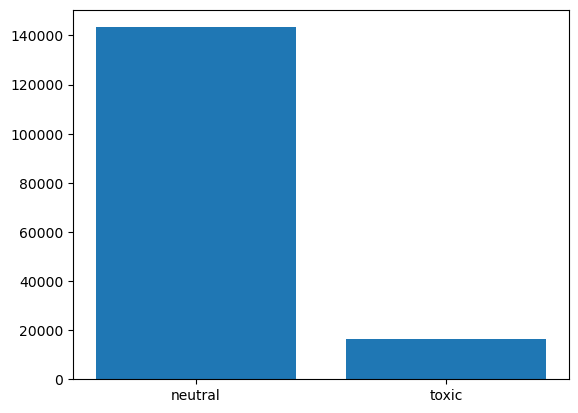

In [131]:
# sns.countplot(data=data)  # ye chla nhi

plt.bar(sr.index, sr.values);

FOR ALL CATEGORIES

<BarContainer object of 7 artists>

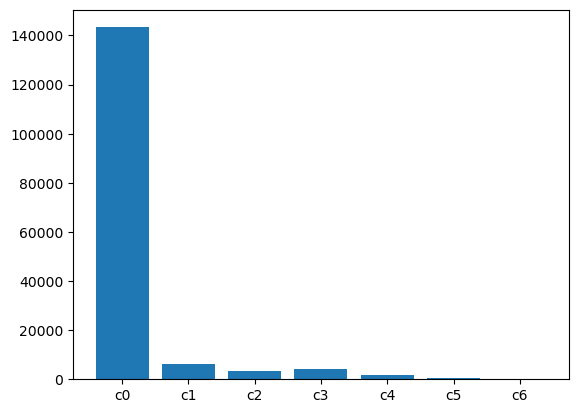

In [132]:
total = df.sum(axis=1, numeric_only=True)
c = []
for i in range(len(toxicities)+1):
    c.append(sum(total == i))

srr = pd.Series(c, index=['c0','c1','c2','c3','c4','c5','c6'])

plt.bar(srr.index, srr.values)

<BarContainer object of 6 artists>

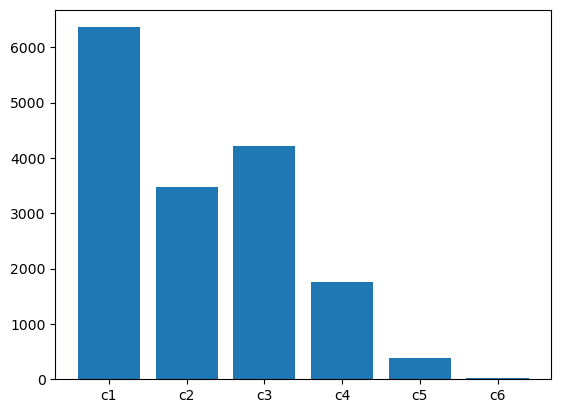

In [133]:
total = df.sum(axis=1, numeric_only=True)
c = []
for i in range(1,len(toxicities)+1):
    c.append(sum(total == i))

srr = pd.Series(c, index=['c1','c2','c3','c4','c5','c6'])

plt.bar(srr.index, srr.values)

THIS ALSO WORKS

In [134]:
# total = df.sum(axis=1, numeric_only=True)
# c = [sum(total==i) for i in range(len(toxicities)+1)]

# srr = pd.Series(c, index=['c0','c1','c2','c3','c4','c5','c6'])

# plt.bar(srr.index, srr.values)

<Axes: xlabel='None', ylabel='count'>

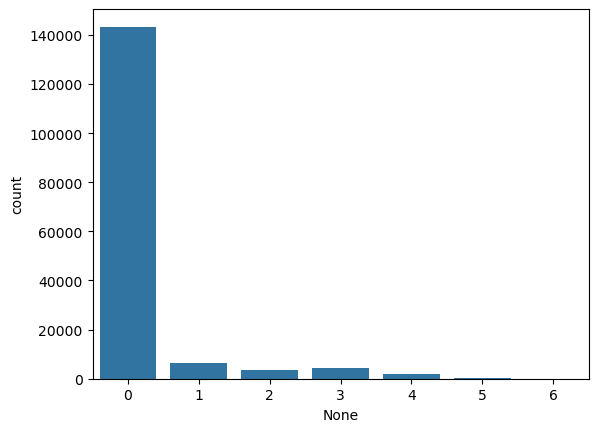

In [135]:
sns.countplot(x=total)

<Axes: xlabel='None', ylabel='count'>

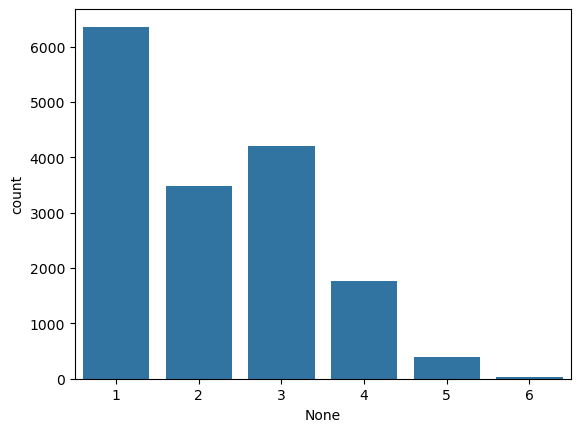

In [136]:
only_toxic = total[total!=0]
sns.countplot(x=only_toxic)

In [137]:
pd.Series(only_toxic).value_counts()

1    6360
3    4209
2    3480
4    1760
5     385
6      31
Name: count, dtype: int64

## DATA CLEANING

In [138]:
import re
from nltk.corpus import stopwords #do it later
from nltk.tokenize import word_tokenize

swords = stopwords.words('english')
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]+', ' ', text)
    text = word_tokenize(text)
    text = [t for t in text if t not in swords]
    text = " ".join(text)
    return text
clean_text("OOO! Kive h singh? is am")

'ooo kive h singh'

In [139]:
comment_text = df['comment_text'].apply(clean_text)
comment_text

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567    ashamed horrible thing put talk page 128 61 19 93
159568    spitzer umm theres actual article prostitution...
159569    looks like actually put speedy first version d...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [140]:
import numpy as np

# labels = np.array(df[toxicities])
# labels

# or

lables = df[toxicities].values
lables

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], shape=(159571, 6))

### Prepare input data

In [145]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [142]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(comment_text)
sequences = tokenizer.texts_to_sequences(comment_text)
padded = pad_sequences(sequences, maxlen=200, padding='post')

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    padded, lables, random_state=0, test_size=0.2
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((127656, 200), (127656, 6), (31915, 200), (31915, 6))

# BUILD THE MODEL

In [147]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GRU

model = Sequential()

model.add(Embedding(5000,100, input_length=200))
model.add(GRU(64))
model.add(Dense(6,activation='sigmoid')) # we will use sigmoid in multilabel because then we can get multi labels with more than 0.5 probability


d:\DAI Aug-25\softwares\conda_env\dnn\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [148]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# TRAIN THE MODEL

In [149]:
hist = model.fit(X_train,y_train, validation_data=[X_test, y_test], epochs=3)

Epoch 1/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 452s 112ms/step - accuracy: 0.9853 - loss: 0.0704 - val_accuracy: 0.9901 - val_loss: 0.0550
Epoch 2/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 440s 110ms/step - accuracy: 0.9903 - loss: 0.0491 - val_accuracy: 0.9930 - val_loss: 0.0516
Epoch 3/3
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 442s 111ms/step - accuracy: 0.9889 - loss: 0.0441 - val_accuracy: 0.9902 - val_loss: 0.0522


In [191]:
sample_text = 'You are stupid stupid stupid. No one cares your opinion. Just shut up.'


In [189]:
def predict(new_comment):
    cleaned = clean_text(new_comment)
    new_seq = tokenizer.texts_to_sequences([cleaned])
    new_pad = pad_sequences(new_seq, maxlen=200)
    pred = model.predict(new_pad)
    cats = [toxicities[i] for i in range(len(pred[0])) if pred[0][i] > 0.5]
    return cats



In [198]:
sample2 = 'Threaten you'
predict(sample2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


[]